<a href="https://colab.research.google.com/github/OllyMuh/Python_for_DataScience/blob/Project_EDA/EDA_RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [55]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

# пути к директориям и файлам
DATASET_PATH = '/content/drive/MyDrive/train_prepared.csv'
PREPARED_DATASET_PATH = '/content/drive/MyDrive/train_prepared_EDA.csv'

In [56]:
matplotlib.rcParams.update({'font.size': 14})

In [57]:
df = pd.read_csv(DATASET_PATH, sep=',')

**Оптимизируем объем используемой памяти** 

In [58]:
def reduce_mem_usage(df):
  start_mem = df.memory_usage().sum() / 1024 ** 2
  print(f'Memory usage is {start_mem} Mb')

  for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
      c_min = df[col].min()
      c_max = df[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          df[col] = df[col].astype(np.float32)
        else:
          df[col] = df[col].astype(np.float64)
    else:
      df[col] = df[col].astype('category')
  end_mem = df.memory_usage().sum() / 1024 **2
  print(f'Memory usage after {end_mem} Mb')
  return df

In [59]:
reduce_mem_usage(df)
df.dtypes

Memory usage is 2.1363525390625 Mb
Memory usage after 0.5630645751953125 Mb


Id                          int16
DistrictId                  int16
Rooms                     float32
Square                    float32
LifeSquare                float32
KitchenSquare             float32
Floor                        int8
HouseFloor                float32
HouseYear                   int32
Ecology_1                 float32
Ecology_2                category
Ecology_3                category
Social_1                     int8
Social_2                    int16
Social_3                    int16
Healthcare_1              float32
Helthcare_2                  int8
Shops_1                      int8
Shops_2                  category
Price                     float32
LifeSquare_nan               int8
Healthcare_1_nan             int8
LifeSquare_toobig            int8
HouseFloor_null              int8
Floor_more_then_House        int8
Shops_2_int                  int8
Ecology_2_int                int8
Ecology_3_int                int8
dtype: object

# Распределение целевой переменной (цена квартир)

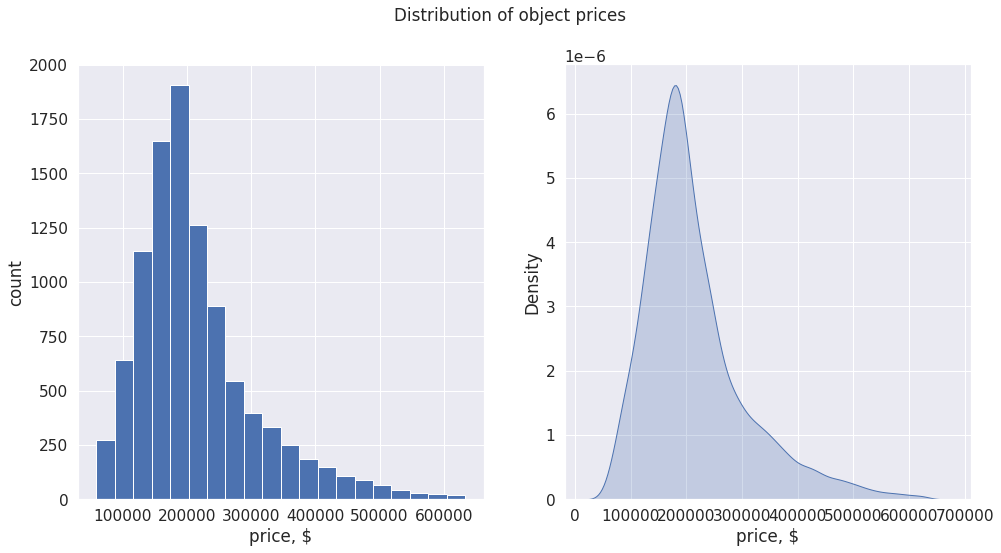

In [60]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.xlabel('price, $')
plt.ylabel('count')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price, $')

plt.suptitle('Distribution of object prices')
plt.show()

In [61]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
#target_mode = df['Price'].mode()[0]

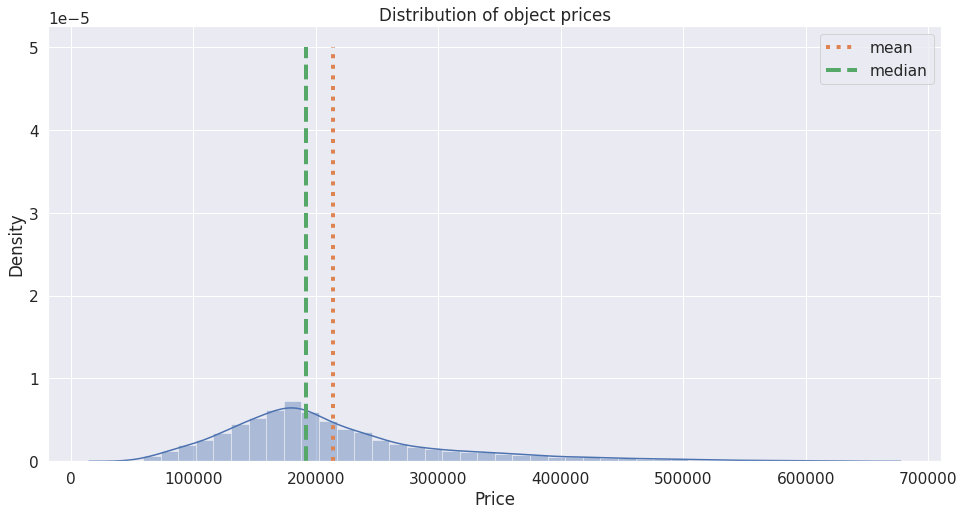

In [62]:
plt.figure(figsize=(16, 8))
sns.distplot(df['Price'], bins=40)

y=np.linspace(0, 0.00005, 2)
plt.plot([target_mean]*2, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median]*2, y, label='median', linestyle='--', linewidth=4)
#plt.plot([target_mode]*2, y, label='mode', linestyle= '-.', linewidth=4)

plt.title('Distribution of object prices')
plt.legend()
plt.show()

# Анализ признаков

**Количественные признаки**

In [63]:
df_num_features = df.select_dtypes(include=['float32', 'float16'])
df_num_features.drop('Price', axis=1, inplace=True)   # без ненужных столбцов и цены
df_num_features.head()

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1
0,3.0,115.027313,115.027313,10.0,10.0,0.075424,900.0
1,1.0,39.832523,23.169222,8.0,8.0,0.118537,1183.0
2,3.0,78.342216,47.671970,10.0,17.0,0.025609,240.0
3,1.0,40.409908,40.409908,1.0,22.0,0.007122,900.0
4,2.0,64.285065,38.562515,9.0,16.0,0.282798,900.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff64e720950>,
      dtype=object)

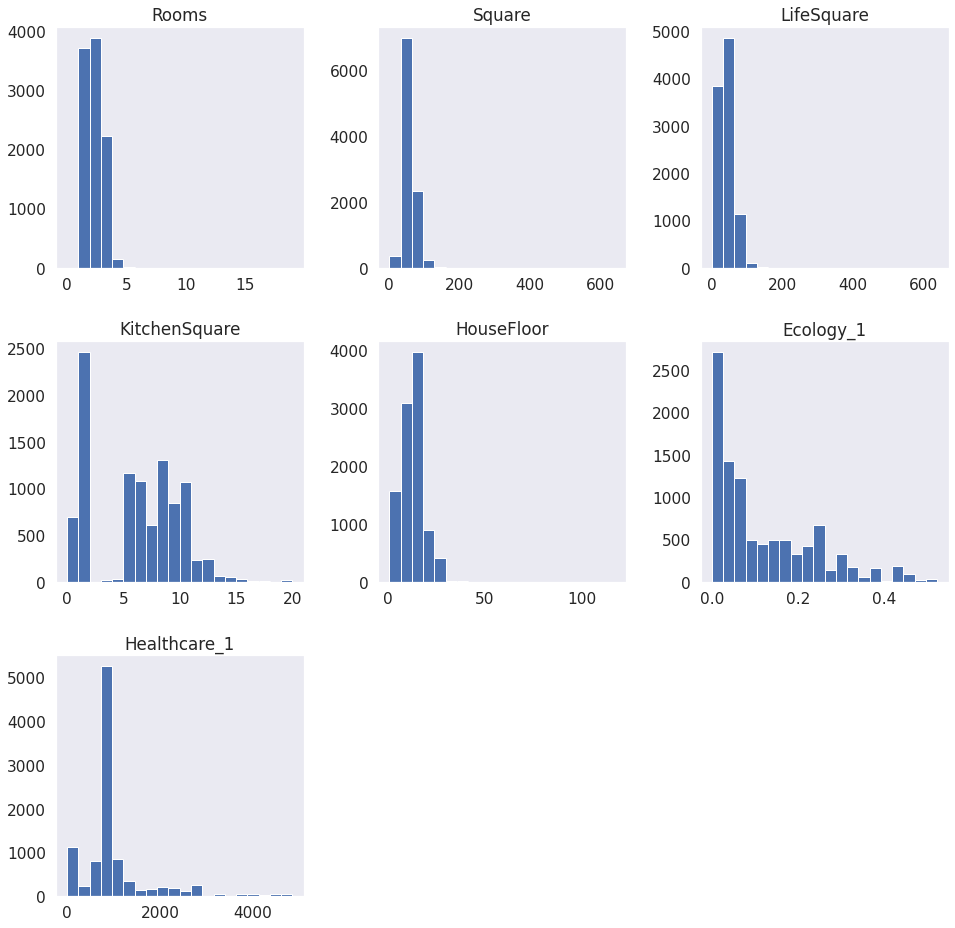

In [64]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False)

Просто посмотреть есть ли зависимость между признаками

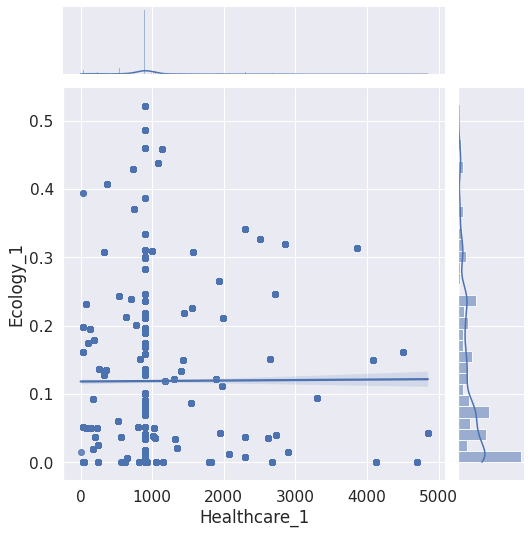

In [65]:
grid = sns.jointplot(df['Healthcare_1'], df['Ecology_1'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)
plt.show()

In [66]:
df['LifeSquare'].describe()

count    10000.000000
mean        41.184109
std         22.465101
min          0.370619
25%         25.491704
50%         37.415758
75%         49.948885
max        638.163208
Name: LifeSquare, dtype: float64

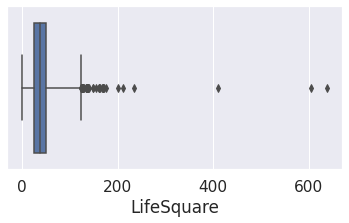

In [67]:
plt.figure(figsize=(6,3))

sns.boxplot(df['LifeSquare'], whis=3)
plt.xlabel('LifeSquare')
plt.show()

In [68]:
# заменяем значения выбросов (жилая площадь больше 200 м кв) медианным значением
df.loc[df['LifeSquare'] > 200, 'LifeSquare'] = df['LifeSquare'].median()
# заменяем значения выбросов (жилая площадь меньше 10 м кв) медианным значением
df.loc[df['LifeSquare'] < 10, 'LifeSquare'] = df['LifeSquare'].median()

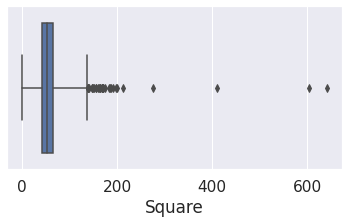

In [69]:
plt.figure(figsize=(6,3))

sns.boxplot(df['Square'], whis=3)
plt.xlabel('Square')
plt.show()

In [70]:
# заменяем значения выбросов (площадь больше 250 м кв) медианным значением
df.loc[df['Square'] > 250, 'Square'] = df['Square'].median()
# заменяем значения выбросов (площадь меньше 40 м кв) медианным значением
df.loc[df['Square'] < 40, 'Square'] = df['Square'].median()

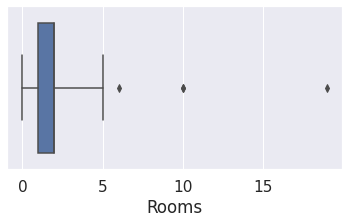

In [71]:
plt.figure(figsize=(6,3))

sns.boxplot(df['Rooms'], whis=3)
plt.xlabel('Rooms')
plt.show()

In [72]:
# заменяем значения выбросов (количество комнат больше 5) медианным значением
df.loc[df['Rooms'] > 5, 'Rooms'] = df['Rooms'].median()
# заменяем значения выбросов (количество комнат 0) медианным значением
df.loc[df['Rooms'] == 0, 'Rooms'] = df['Rooms'].median()

In [73]:
df['HouseFloor'].describe()

count    10000.000000
mean        13.435700
std          6.094054
min          1.000000
25%          9.000000
50%         14.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

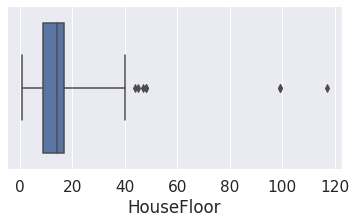

In [74]:
plt.figure(figsize=(6,3))

sns.boxplot(df['HouseFloor'], whis=3)
plt.xlabel('HouseFloor')
plt.show()

In [75]:
# заменяем значения выбросов (этаж выше 40) медианным значением
df.loc[df['HouseFloor'] > 40, 'HouseFloor'] = df['HouseFloor'].median()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff64db182d0>,
      dtype=object)

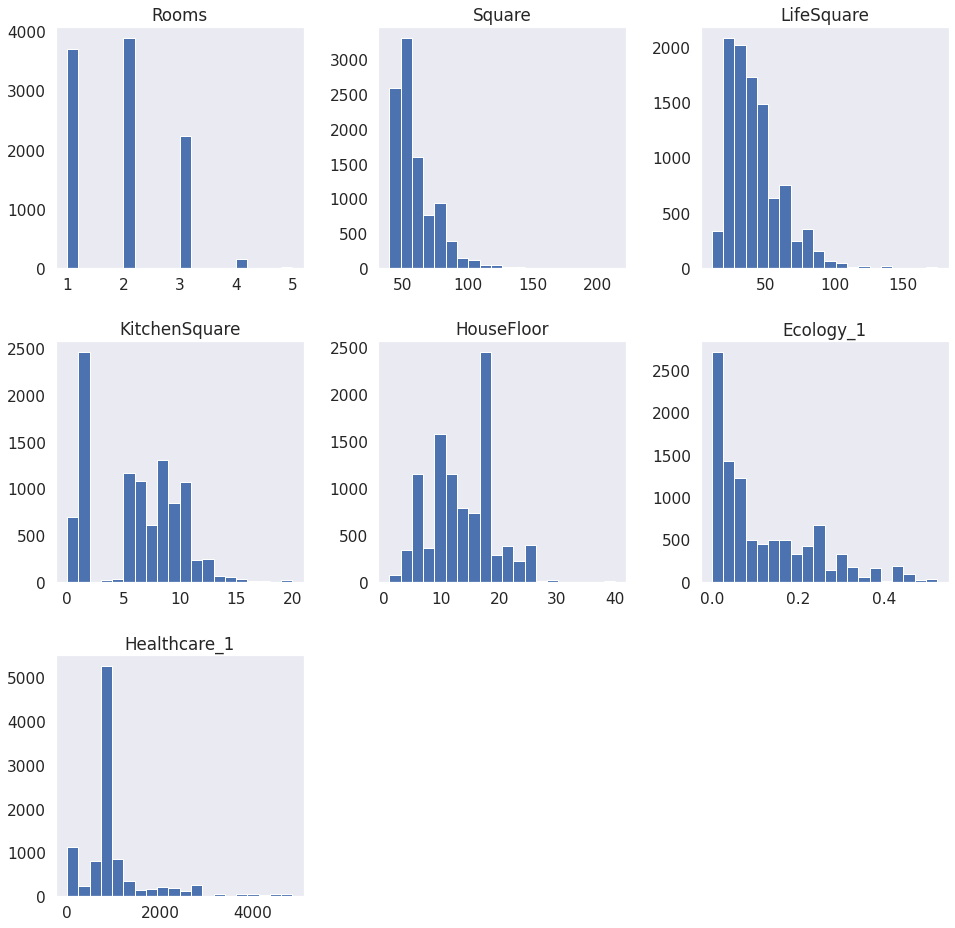

In [76]:
df_num_features = df.select_dtypes(include=['float32', 'float16', 'float64'])
df_num_features.drop('Price', axis=1, inplace=True)   # без ненужных столбцов и цены

df_num_features.hist(figsize=(16,16), bins=20, grid=False)

**Категориальные признаки**

In [77]:
counts_year = df['HouseYear'].value_counts()
counts_year

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [78]:
df['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [79]:
df.loc[df['HouseYear'] > 2021]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,LifeSquare_toobig,HouseFloor_null,Floor_more_then_House,Shops_2_int,Ecology_2_int,Ecology_3_int
8828,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375,0,0,0,0,0,2,2,2
9163,10814,109,1.0,52.513039,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250,0,0,0,0,0,2,2,2


In [80]:
# удаляем строки с некорректными значениями года
ind_nonvalid = df[df['HouseYear'] > 2021].index
df_less_nonvalid = df.drop(ind_nonvalid, axis=0, inplace=True)

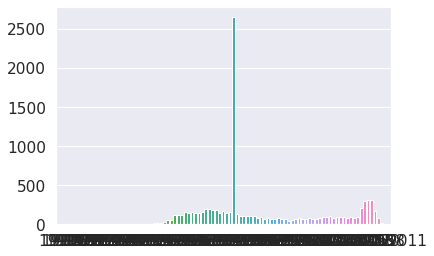

In [81]:
sns.barplot(counts_year.index, counts_year.values)
plt.show()

In [82]:
counts_shops = df['Shops_1'].value_counts()
counts_shops

0     2316
1     1325
5     1324
2      964
4      841
3      711
6      486
11     401
9      316
7      294
8      252
23     245
10     215
15     176
16      83
19      49
Name: Shops_1, dtype: int64

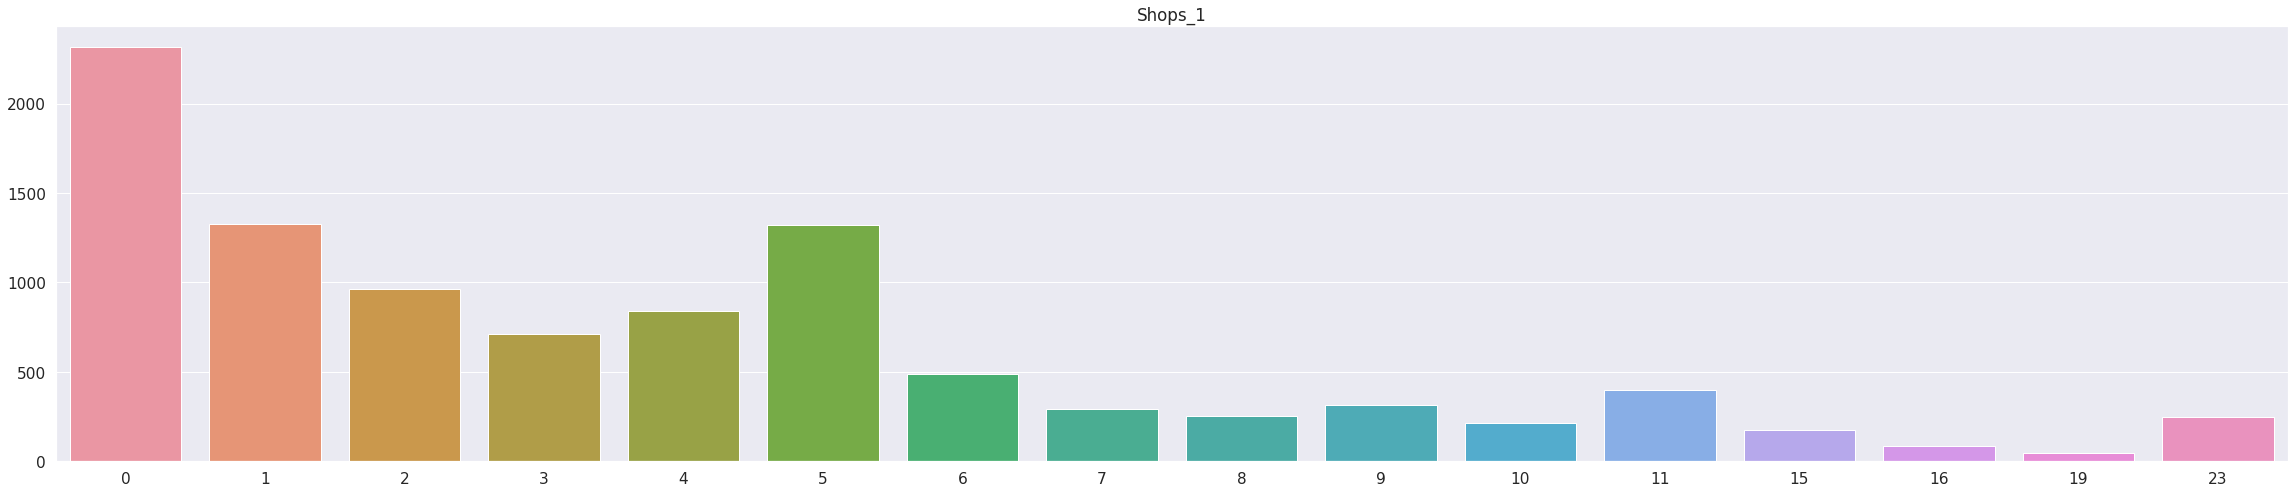

In [83]:
plt.figure(figsize=(40,8))
plt.title('Shops_1')
sns.barplot(counts_shops.index, counts_shops.values)

plt.show()

**Матрица корреляций**

In [84]:
#df.head()
corr_matrix = df.corr()
corr_matrix

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_nan,Healthcare_1_nan,LifeSquare_toobig,HouseFloor_null,Floor_more_then_House,Shops_2_int,Ecology_2_int,Ecology_3_int
Id,1.000000,0.012763,-0.008565,-0.006073,-0.013416,0.010763,0.001401,-0.001120,0.003469,0.017981,-0.000788,-0.002033,-0.009385,-0.002963,0.001283,-0.008789,0.009839,-0.013445,0.000685,-0.005323,-0.011428,0.000057,0.003610,0.003088,-0.005428
DistrictId,0.012763,1.000000,0.075871,-0.008450,-0.185833,0.249134,-0.120239,-0.207744,-0.201113,0.064931,0.246502,0.167542,0.136056,0.264962,0.305665,0.174056,0.265066,-0.277819,-0.185208,-0.090296,-0.045219,-0.010717,-0.021132,-0.093473,-0.027971
Rooms,-0.008565,0.075871,1.000000,0.685514,0.547789,0.128587,-0.006077,-0.037532,-0.043634,-0.030744,0.076443,0.071363,0.014036,0.038712,0.063237,0.053273,0.571723,-0.068072,-0.042436,-0.031806,-0.010671,0.006984,-0.000899,-0.002287,-0.006536
Square,-0.006073,-0.008450,0.685514,1.000000,0.742781,0.085440,0.084600,0.088922,0.159922,-0.071338,-0.061728,-0.037862,0.027453,-0.019646,-0.015332,0.015352,0.549477,0.076141,0.037196,0.041242,0.060901,0.043548,-0.051703,0.024858,0.033190
LifeSquare,-0.013416,-0.185833,0.547789,0.742781,1.000000,-0.361068,0.147623,0.144527,0.113540,-0.088352,-0.317228,-0.265303,0.053730,-0.102159,-0.180833,-0.067765,0.298823,0.485409,0.137593,0.190794,0.163940,0.086747,-0.099799,0.044203,0.078186
KitchenSquare,0.010763,0.249134,0.128587,0.085440,-0.361068,1.000000,-0.019881,0.069725,0.161703,0.026600,0.387071,0.350155,-0.071314,0.098377,0.217073,0.114303,0.307246,-0.576909,-0.124199,-0.157088,-0.224415,-0.137361,0.043834,-0.013295,-0.073433
Floor,0.001401,-0.120239,-0.006077,0.084600,0.147623,-0.019881,1.000000,0.600524,0.284442,-0.015991,-0.044917,-0.016575,-0.002209,-0.105946,-0.065360,0.024331,0.128745,0.136921,0.062413,0.056565,0.015828,0.202930,-0.013603,0.049671,0.025781
HouseFloor,-0.001120,-0.207744,-0.037532,0.088922,0.144527,0.069725,0.600524,1.000000,0.466133,-0.022994,-0.071376,-0.029634,-0.025641,-0.149715,-0.120765,0.010088,0.114793,0.169147,0.086571,0.059664,-0.124426,-0.175702,0.000314,0.078004,0.027144
HouseYear,0.003469,-0.201113,-0.043634,0.159922,0.113540,0.161703,0.284442,0.466133,1.000000,-0.066371,-0.047949,0.013625,-0.049372,-0.171963,-0.116322,-0.002113,0.036607,-0.088792,0.146356,0.181842,-0.049987,-0.017767,-0.058840,0.076816,0.047168
Ecology_1,0.017981,0.064931,-0.030744,-0.071338,-0.088352,0.026600,-0.015991,-0.022994,-0.066371,1.000000,0.026461,0.009287,-0.124145,0.003978,0.030456,-0.076901,-0.058449,-0.059385,-0.232109,-0.028914,-0.047002,-0.015018,0.079766,-0.110759,-0.223260


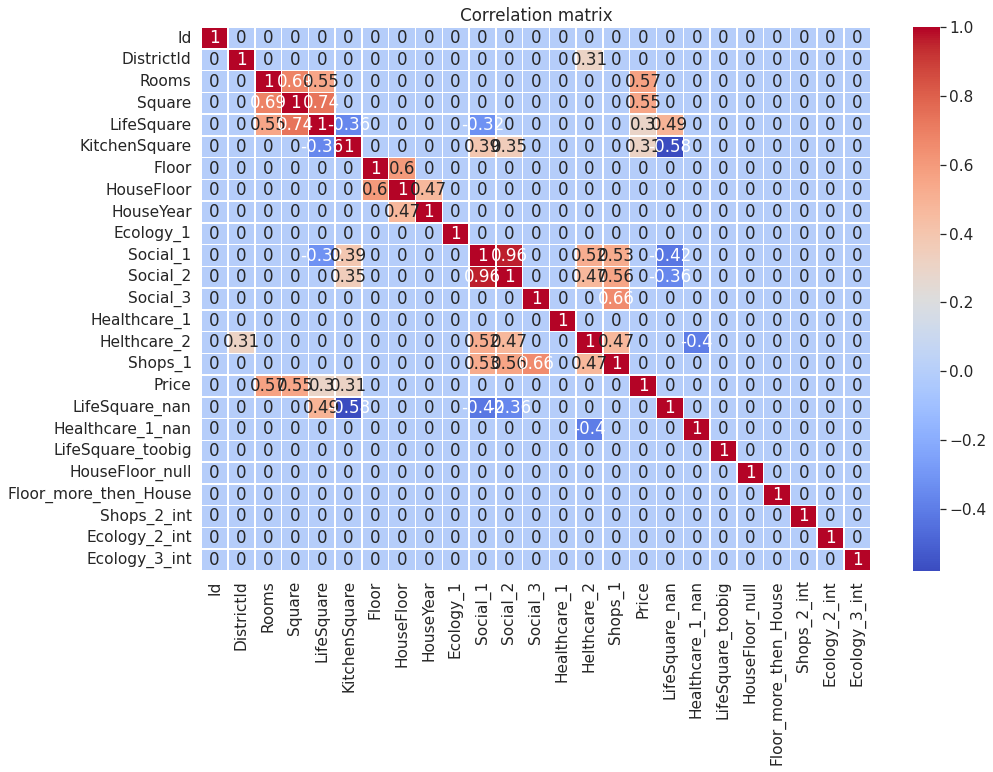

In [85]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.4)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix')

plt.show()

In [86]:
# отбрасываем признак LifeSquare - так как сильная корреляция между ним и Square
df.drop(['LifeSquare'], axis=1, inplace = True)

In [87]:
df.head()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan,LifeSquare_toobig,HouseFloor_null,Floor_more_then_House,Shops_2_int,Ecology_2_int,Ecology_3_int
0,11809,27,3.0,115.027313,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,900.0,0,0,B,305018.875000,1,1,0,0,0,2,2,2
1,3013,22,1.0,52.513039,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875,0,0,0,0,0,2,2,2
2,8215,1,3.0,78.342216,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750,0,0,0,0,0,2,2,2
3,2352,1,1.0,40.409908,1.0,10,22.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,168106.000000,1,1,0,0,0,2,2,2
4,13866,94,2.0,64.285065,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,900.0,0,6,B,343995.093750,0,1,0,0,0,2,2,2


# Зависимость цены от признаков

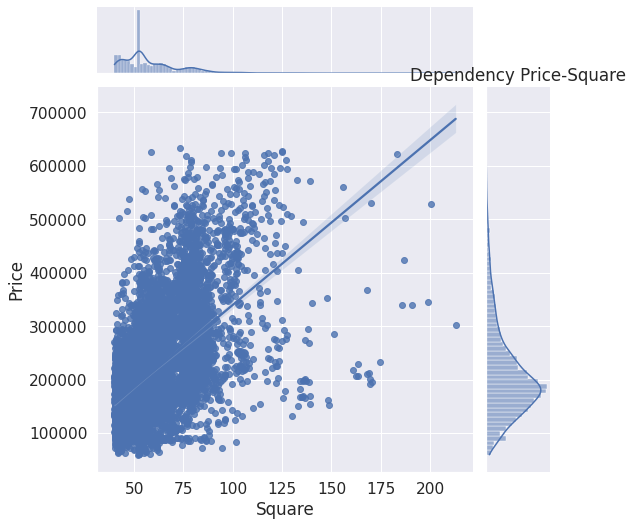

In [88]:
grid = sns.jointplot(df['Square'], df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.title('Dependency Price-Square')
plt.show()

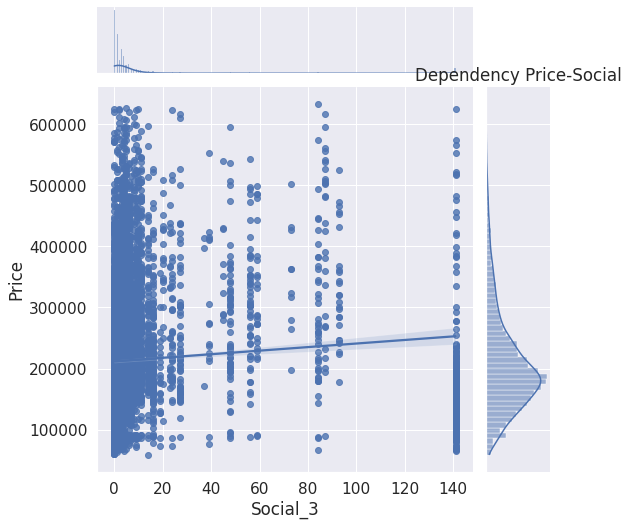

In [89]:
grid = sns.jointplot(df['Social_3'], df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.title('Dependency Price-Social')
plt.show()

In [91]:
# отбрасываем признак Id
df.drop(['Id'], axis=1, inplace = True)

In [93]:
# отбрасываем признаки Ecology_2 Ecology_3
df.drop(['Ecology_2', 'Ecology_3'], axis=1, inplace = True)

In [95]:
# отбрасываем признак Shops_2
df.drop(['Shops_2'], axis=1, inplace = True)

In [98]:
# отбрасываем служебные признаки
df.drop(['LifeSquare_nan', 'Healthcare_1_nan', 'LifeSquare_toobig', 'HouseFloor_null', 'Floor_more_then_House'], axis=1, inplace = True)

In [99]:
df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2_int,Ecology_2_int,Ecology_3_int
0,27,3.0,115.027313,10.0,4,10.0,2014,0.075424,11,3097,0,900.0,0,0,305018.875000,2,2,2
1,22,1.0,52.513039,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.546875,2,2,2
2,1,3.0,78.342216,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.718750,2,2,2
3,1,1.0,40.409908,1.0,10,22.0,1977,0.007122,1,264,0,900.0,0,1,168106.000000,2,2,2
4,94,2.0,64.285065,9.0,16,16.0,1972,0.282798,33,8667,2,900.0,0,6,343995.093750,2,2,2


In [100]:
# сохраняемся
df.to_csv(PREPARED_DATASET_PATH)